**Public Transport Network Analysis**

**Import Libraries:**

*   Import necessary libraries including GeoPandas, Folium, and Matplotlib.

**Load GeoDataFrame:**

*   Read the GeoJSON file containing Railway stations  data using GeoPandas, storing the data in the Railway_stations variable.


**Display the Matplotlib Plot:**


* Use plt.show() to display the Matplotlib plot showing the Railway stations

**Create Folium Map:**


*   Calculate the mean coordinates of the Railway stations and set them as the center of the Folium map.
*   Create a Folium map (mymap) centered around the mean coordinates with a specified zoom level.



**Display the Folium Map:**

* Use the display function to show the Folium map.

In [ ]:
!pip install osmnx
!pip install matplotlib
!pip install geopandas
!pip install folium
!pip install Marker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.6/203.6 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Install required libraries
!pip install geopandas
!pip install folium

# Import libraries
import geopandas as gpd
import folium

# Step 1: Upload the GeoJSON file to your Colab environment
# - Click the "Files" tab on the left-hand side.
# - Use the "Upload" button to upload your 'railways.geojson' file.

# Step 2: Load the Progue Railways dataset
# Replace 'railways.geojson' with the actual file path or filename
Prague_railways_data = gpd.read_file('/content/export.geojson')

# Create a Folium map centered at a specific location (e.g., India)
map_railways = folium.Map(location=[50.0755, 14.4378], zoom_start=11)

# Iterate over all railway features and add them to the map with custom icons
for _, feature in Prague_railways_data.iterrows():
    # Extract latitude and longitude from the feature's geometry
    lat, lon = feature.geometry.centroid.y, feature.geometry.centroid.x
    # You can customize the popup content using attributes from your dataset
    name = feature['name'] if 'name' in feature else 'Railway'
    folium.Marker([lat, lon], popup=name, icon=folium.Icon(icon='train', color='blue')).add_to(map_railways)

# Display the map in the Colab notebook
map_railways


<ipython-input-35-d37db21e8281>:18: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


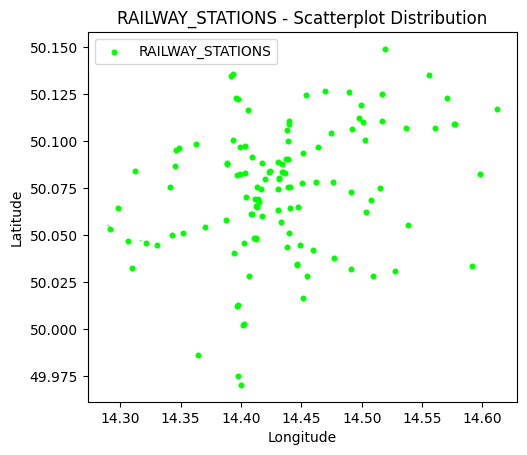

Total RAILWAY_STATIONS count: 135


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load GeoJSON files for railway stations
railway_stations = gpd.read_file('/content/export.geojson')


# Assess efficiency and coverage
def assess_efficiency_coverage(data, category):
    # Calculate total count
    total_count = len(data)

    # Visualize the data on a map
    data.plot(marker='o', color='lime', markersize=11, label=category)
    plt.title(f'{category} - Scatterplot Distribution')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()

    print(f'Total {category} count: {total_count}')

# Assess efficiency and coverage for each dataset
assess_efficiency_coverage(railway_stations, 'RAILWAY_STATIONS')


**Heat Map Distribution :**

In [ ]:
from folium import plugins
import folium

# Create a Folium map centered around the pedestrian data
map_center = [Railway_stations.geometry.centroid.y.mean(), Railway_stations.geometry.centroid.x.mean()]
mymap = folium.Map(location=map_center, zoom_start=11)

# Add pedestrian paths to the map
folium.GeoJson(Railway_stations).add_to(mymap)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in Railway_stations.geometry.centroid]
plugins.HeatMap(heat_data).add_to(mymap)

#display map
display(mymap)

<ipython-input-41-d80d2821528c>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [Railway_stations.geometry.centroid.y.mean(), Railway_stations.geometry.centroid.x.mean()]
<ipython-input-41-d80d2821528c>:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  heat_data = [[point.xy[1][0], point.xy[0][0]] for point in Railway_stations.geometry.centroid]
